## Inicjalizacja środowiska programistycznego

In [1]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params) 

#append path with python modules
import importlib
import sys
sys.path.append("modules")

#Private functions
import plotting_functions as plf
importlib.reload(plf)

import quadratic_equation as qef
importlib.reload(qef);

2024-01-02 16:06:54.542063: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Architektura gęsta/w pełni połączona - ang. dense/fully connected, FCN

Standardowa architektura sieci neuronowej to wiele warstw następujących **sekwencyjnie** po sobie.

* warstwy ukryte mają zwykle funkcję aktywacji ReLu:

```Python
tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
```

* warsty wyjściowe mają zwykle funkcję aktywacji:
    * **liniową** - dla zagadnienia regresji:
      <br></br>
      
      ```Python
      tf.keras.layers.Dense(nNeurons, activation="linear", name="layer_{}".format(iLayer))(x)
      ```

     <br></br>
    * **softmax** - dla zagadnienia klasyfikacji:
      <br></br>
      ```Python
       tf.keras.layers.Dense(nNeurons, activation="softmax", name="layer_{}".format(iLayer))(x)
      ```
      <br></br>

Funkcje podawane a konstruktorze można określać używając nazwy lub podając obiekt funkcji explicite:
```Python
tf.keras.layers.Dense(nNeurons, activation="relu", name="layer_{}".format(iLayer))(x)
tf.keras.layers.Dense(nNeurons, activation=tf.keras.activations.relu, name="layer_{}".format(iLayer))(x)
```

W architekturze gęstej dana warstwa przyjmuje jako wejście wyjście z warstwy poprzedniej. Wyjątkiem jest oczywiście warstwa wejściowa.

Warstwa gęsta, `tf.keras.layers.Dense` przyjmuje wiele argumentów sterujących:
```Python
tf.keras.layers.Dense(
    units,                    #liczba neuronów
    activation=None,          #funkcja aktywacji
    use_bias=True,            #flaga sterująca obecnością wyrazu wolnego: w*x+b
    kernel_initializer='glorot_uniform',#rozkład prawdopodobieństwa dla początkowych wartości wag
    bias_initializer='zeros', #rozkład prawdopodobieństwa dla początkowych wartości wyrazów wolnych
    kernel_regularizer=None,  #funckja regularyzyjąca wartości wag
    bias_regularizer=None,    #funkcja regularyzyjąca wartości wag
    activity_regularizer=None,#funkcja regularyzyjąca wartość wyjświoną neuronu
    kernel_constraint=None,   #funckja nakładająca ograniczenia na wartości wag
    bias_constraint=None,     #funckja nakładająca ograniczenia na wartości wyrazów wolnych
    **kwargs
)
```

Sieć neuronowa złożona z 
* warstwy wejśćiowej przyjumującej `nInputs` zmiennych
* dwu warst ukrytych o `nNeurons` neuronach (jednostkach)
* warstwy wyjściowej o `nOutputNeurons` neuronach

In [2]:
nInputs = 4
nNeurons = 3
nOutputNeurons = 1

inputs = tf.keras.Input(shape=(nInputs,), name="features")

layer1 = tf.keras.layers.Dense(nNeurons, name="layer_1")(inputs)
layer2 = tf.keras.layers.Dense(nNeurons, name="layer_2")(layer1)
            
outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer2)   

model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
tf.keras.utils.plot_model(model, 'fig_png/ML_model.png', show_shapes=True)
model.summary()

2024-01-02 16:06:56.132830: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-02 16:06:56.137706: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-02 16:06:56.137836: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 4)]               0         
                                                                 
 layer_1 (Dense)             (None, 3)                 15        
                                                                 
 layer_2 (Dense)             (None, 3)                 12        
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Definicję modelu dużo wygodniej jest jednak zadać w pętli.

**Proszę:**

Napisać funkcję `getModel()`, 

```Python
getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1)
```

która przyjmuje następujące argumenty:

* kształ danych wejściowych: `inputShape`
* listę zwierającą liczby neuronów w kolejnych warstwach, włączając warstwę wyjściową: `nNeurons = [64,32,16,1]`
* funkcje aktywacji dla warst ukrytych i wyjściowej: `hiddenActivation, outputActivation` z odpowiednimi wartościami domyślnymi
* liczbę neuronów wyjściowych: `nOutputNeurons` z domyślną wartością `1`

Następnie proszę zainicjalizować zmienną `model` używając funkcji `getModel()` i wypisać podsumowanie modelu używająć metody `summary()` 

In [3]:
#BEGIN_SOLUTION
def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):

    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  #kernel_initializer=tf.keras.initializers.RandomNormal(),
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  name="layer_"+str(iLayer))(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

model = getModel((128), [64,32,16,1])
model.summary()
#END_SOLUTION
pass

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 128)]             0         
                                                                 
 layer_0 (Dense)             (None, 64)                8256      
                                                                 
 layer_1 (Dense)             (None, 32)                2080      
                                                                 
 layer_2 (Dense)             (None, 16)                528       
                                                                 
 layer_3 (Dense)             (None, 1)                 17        
                                                                 
 output (Dense)              (None, 1)                 2         
                                                                 
Total params: 10883 (42.51 KB)
Trainable params: 10883 (42.51 K

**Proszę:**

* zbudować model z jedną warstwą ukrytą o 1024 neuronach i jednej cesze wejściowej
* ustawić inicjalizację wag na gaussowską:
  
```Python
tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
  
```
* ustawić inicjalizację wyrazu wolnego wedgług rozkłądu płaskiego w zakresie `[-1,1]`:
  
```Python
tf.keras.initializers.RandomUniform(minval=-1, maxval=1)

```
* narysować histogram wartości wag
* narysować histogram wartości wyrazów wolnych

**Wskazówka:** proszę zwrócić uwagę na kształt macierzy wag i wyrazów wolnych przy rysowaniu histogramu

Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 1)]               0         
                                                                 
 layer_0 (Dense)             (None, 1024)              2048      
                                                                 
 output (Dense)              (None, 1)                 1025      
                                                                 
Total params: 3073 (12.00 KB)
Trainable params: 3073 (12.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


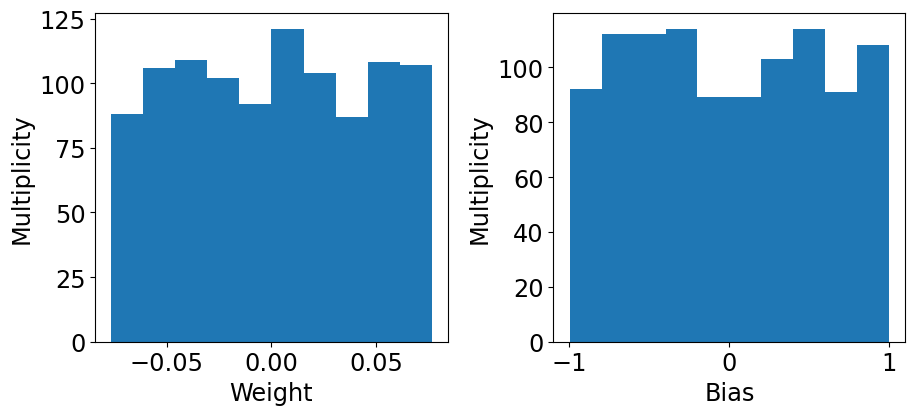

In [4]:
#BEGIN_SOLUTION
model = getModel((1), [1024])
model.summary()

weights = model.get_layer('layer_0').weights[0].numpy()[0,:]
biases = model.get_layer('layer_0').weights[1].numpy()[:]

fig, axes = plt.subplots(1, 2, figsize=(9,4.5))
axes[0].hist(weights, label="Layer weights");
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Multiplicity')

axes[1].hist(biases, label="Layer biases");
axes[1].set_xlabel('Bias')
axes[1].set_ylabel('Multiplicity')
axes[1].set_xlim([-1.1,1.1])
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

Domyślnie wagi warstwy gęstej są inicjalizowane za pomocą rozkładu płaskiego w zakresie `[-w, w]` gdzie
$$
\Large{
w = \frac{\sqrt{6}}{nInput + nOutput}
}
$$

```Python
tf.keras.initializers.GlorotUniform(seed=None)
```

Inicjalizacja typu Glorot (nazwa on nazwiska osoby która ją zaproponowała) poprawia zbieżność uczenia. W szczególności redukuje efekty
* **zanikania gradientu** - sieć w pewnym momencie, przestaje się uczyć, pomimo ewidentnego niedopasowania do danych
* **wybuchania gradientu** - w pewnym momencie sieć zaczyna zwracać 

W niektórych źródłach dla funkcji aktywacji ReLU jest polecana wersja `He uniform`:

$$
\Large{
w = \frac{\sqrt{6}}{nInput}
}
$$

**Proszę:**

* zdefiniować pojedynczą wartwę o 1 neuronie i 12 cechach wejściowych w zakresie `[0,1]`
* użyć domyślnej inicjalizacji wag i wyrazu wolnego
* przygotować 10 000 przykładów o 12 losowych cechach danych rozkładem płaskim  w zakresie `[0,1]`
* narysować rozkład wartości cech wejściowych
* narysować rozkład wartości wyjściowej warstwy
* proszę powtórzyć rysunki z wykładniczym rozkładem cech

**Pytanie**: dlaczego rozkład wartości warstwy jest jaki jest?

Output mean: 0.0859
Output standard deviation: 0.3900


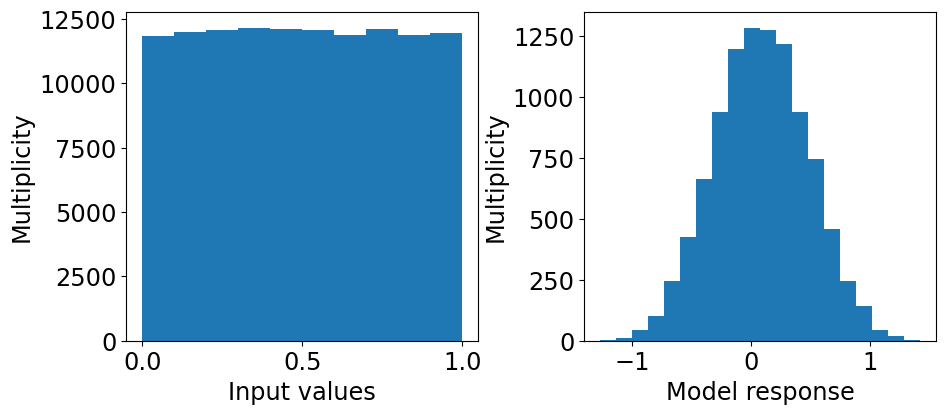

In [5]:
#BEGIN_SOLUTION
model = tf.keras.layers.Dense(1)
x = np.random.default_rng().uniform(0,1, (10000,12))
#x = np.random.default_rng().exponential(1, (10000,12))
y_pred = model(x)

fig, axes = plt.subplots(1, 2, figsize=(9,4.5))
axes[0].hist(x.flatten());
axes[0].set_xlabel('Input values')
axes[0].set_ylabel('Multiplicity')

axes[1].hist(y_pred[:,0], bins=20);
axes[1].set_xlabel('Model response')
axes[1].set_ylabel('Multiplicity')
#axes[1].set_yscale('log')
print(colored("Output mean:","blue"), "{:3.4f}".format(tf.math.reduce_mean(y_pred)))
print(colored("Output standard deviation:","blue"), "{:3.4f}".format(tf.math.reduce_std(y_pred)))
plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

## Rekonstrukcja funkcji schodkowej

**Proszę:**

* wygenerować 256 par $(x,y)$, gdzie:
    * $x$ - liczby losowe zadane rozkładem płaskim w zakresie $[0,1]$
    * $y$ mają wartości:
    $$
    \huge{
    y = 
    \begin{cases}
      1 & \text{gdy x>0 i x<0.5} \\
      0 & \text{w każdym innym przypadku}
      \end{cases}
    }
    $$
* podzielić dane na dwa równe zbiory: treningowy i walidacyjny
* zdefiniować i wytrenować sieć neuronową która odtwarza zależność `y(x)`
* narysować ewolucję funkcji straty na zbiorach testowym i walidacyjnym używająć funkcji `plotHistory()` z modułu `plotting_functions`
* narysować punkty `danych` i wynik modelu na zbiorze treningowym
* narysować punkty `danych` i wynik modelu na zbiorze walidacyjnym
* modyfikująć parametry sieci znależć model który na zbiorze walidacyjnym uzyska precyzję lepszą niż $3\cdot10^{-3}$, gdzie precyzja jest zdefiniowana jako: 
$$
\huge{
\delta = \max{|f(x) - Y|}
}
$$

**Wskazówka:** proszę eksperymentować z liczbą warstw, liczbą neuronów, parametrem uczenia, funkcją aktywacji itd.

2024-01-02 16:07:01.168344: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1dd7f840 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-02 16:07:01.168423: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2070 SUPER, Compute Capability 7.5
2024-01-02 16:07:01.172606: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-01-02 16:07:01.288082: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2024-01-02 16:07:01.363609: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


4/4 [==============================] - 0s 1ms/step
Delta on training set: 0.0004
4/4 [==============================] - 0s 1ms/step
Delta on validation set: 0.2941
CPU times: user 2min 31s, sys: 7.4 s, total: 2min 38s
Wall time: 2min 16s


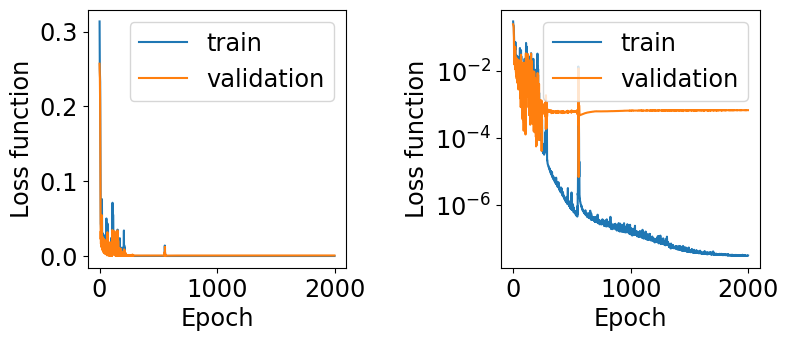

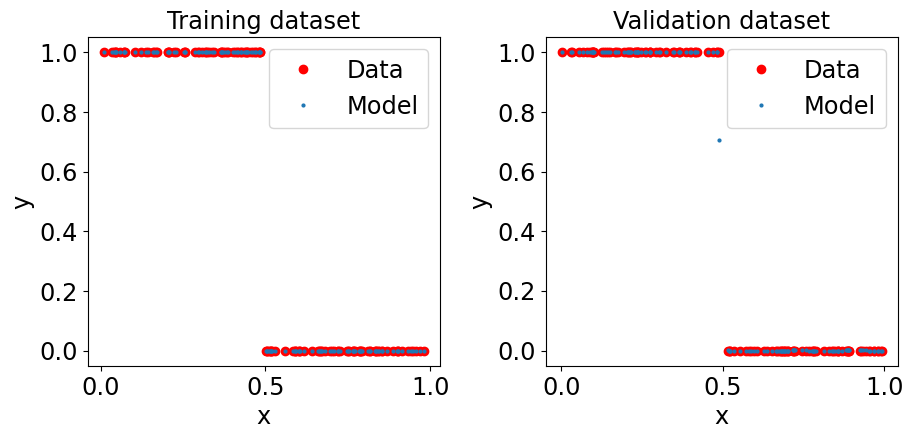

In [6]:
%%time 
#BEGIN_SOLUTION
#data creation
x = np.random.default_rng().uniform(0,1, (256,1))
y = (x>0)*(x<0.5)
y = y.astype(np.float64)
x_train, y_train = x[:128,:], y[:128,:]
x_val, y_val = x[128:,:], y[128:,:]
mask = np.abs(x_val-0.5)>1E-2
x_val = x_val[mask].reshape(-1,1)
y_val = y_val[mask].reshape(-1,1)

#model definition
inputShape = 1
nNeurons = np.full((8), 32)
model = getModel(inputShape, nNeurons)

initial_learning_rate = 1E-3
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                  loss=tf.keras.losses.MeanSquaredError())
                  
#trainining
nEpochs = 2000
history = model.fit(x=x_train, y=y_train, 
                    epochs=nEpochs, 
                    batch_size = 8,
                    validation_data=(x_val, y_val),
                    verbose=0)
plf.plotTrainHistory(history)

#evaluation on test dataset
y_pred = model.predict(x_train)
delta = np.max(y_train - y_pred)
print(colored("Delta on training set:","blue"), "{:3.4f}".format(delta))

fig, axes = plt.subplots(1, 2, figsize=(9,4.5))
axes[0].plot(x_train,y_train,"o", color="red", label="Data");
axes[0].plot(x_train,y_pred,"o", markersize=2, label="Model")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title("Training dataset")
axes[0].legend();

#evaluation on validation dataset
y_pred = model.predict(x_val)
delta = np.max(y_val - y_pred)
print(colored("Delta on validation set:","blue"), "{:3.4f}".format(delta))

axes[1].plot(x_val,y_val,"o", color="red", label="Data");
axes[1].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_title("Validation dataset")
axes[1].legend();

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.3)
#END_SOLUTION
pass

**Proszę:**

* narysować powiększenie rysunku z danymi i wynikiem modelu dla obszaru przed schodkiem: x$\in$[0.41, 0.51], y$\in$[0.99, 1.01]
* narysować powiększenie rysunku z danymi i wynikiem modelu dla obszaru za schodkiem: x$\in$[0.49, 0.61], y$\in$[-0.01, 0.01]

63/63 [==============================] - 0s 793us/step


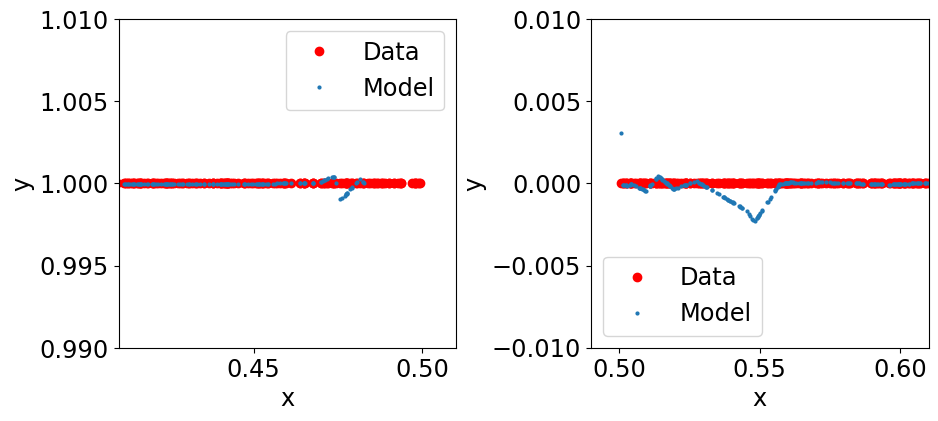

In [7]:
##BEGIN_SOLUTION
fig, axes = plt.subplots(1, 2, figsize=(9,4.5))

x_val = np.random.default_rng().uniform(0,1, (2000,1))
y_val = (x_val>0)*(x_val<0.5)
y_val = y_val.astype(np.float64)
y_pred = model.predict(x_val)

axes[0].plot(x_val,y_val,"o", color="red", label="Data");
axes[0].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_xlim([0.41, 0.51])
axes[0].set_ylim([0.99, 1.01])
axes[0].legend();

axes[1].plot(x_val,y_val,"o", color="red", label="Data");
axes[1].plot(x_val,y_pred,"o", markersize=2, label="Model")
axes[1].set_xlabel('x')
axes[1].set_ylabel('y')
axes[1].set_xlim([0.49, 0.61])
axes[1].set_ylim([-0.01, 0.01])
axes[1].legend();

plt.subplots_adjust(bottom=0.15, left=0.05, right=0.95, wspace=0.4)
#END_SOLUTION
pass

**Proszę:**

* narysować dane i odpowiedź modelu w zakresie poza obszarem użytym do treningu: x$\in$[-5,5] 

63/63 [==============================] - 0s 863us/step


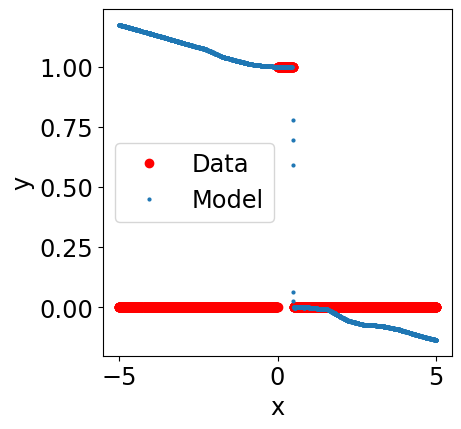

In [8]:
#BEGIN_SOLUTION
x_val = np.random.default_rng().uniform(-5,5, (2000,1))
y_val = (x_val>0)*(x_val<0.5)
y_val = y_val.astype(np.float64)
y_pred = model.predict(x_val)

fig, axes = plt.subplots(1, 1, figsize=(4.5,4.5))
axes.plot(x_val,y_val,"o", color="red", label="Data");
axes.plot(x_val,y_pred,"o", markersize=2, label="Model")
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.legend();
#END_SOLUTION
pass

## Sieć rozwiązująca równane kwadratowe.

**Proszę:**

Przygotować zbior danych dotyczących rozwiązywania równania kwadratowego:

* x - współczynniki równania w zakresie [-1,1]$^{3}$
* y - rozwiązywalność równania: `True/False`.
* ustawić kształt zmiennej `y` na `(-1,1)`
* użyć po 1000 przykładów zbioru uczącego i 10000 dla walidacyjnego
* wypisać na ekran kształty danych. 

In [9]:
nSamples = 1000
x_train = qef.quadraticEqGenertor(nSamples)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)

nSamples = 10000
x_val = qef.quadraticEqGenertor(nSamples)
y_val = np.all(qef.quadraticEqSolution(x_val)!=None, axis=1).reshape(-1,1)

print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

Training data shapes:  (1000, 3) (1000, 1)
Validation data shapes:  (10000, 3) (10000, 1)


/scratch_hdd/akalinow/Zajecia/2023-2024/Lato/Uczenie_maszynowe_2/UczenieMaszynoweII/modules/quadratic_equation.py:21: RuntimeWarning: invalid value encountered in sqrt
  result = np.where(delta>0, np.sqrt(delta), 0.0)


**Proszę:**

* wytrenować sieć która odpowieda na pytanie: **Czy równanie ma rozwiązania?**
* czy uda się uzyskać na zbiorze walidacyjnym wartości metryk:
    * poprawna odpowiedź w >99% przypadkach
* cały kod zawrzeć w funkcji `quadraticEqMLSolver(x_train, y_train, x_val, y_val)`. Funkcja powinna wykonywać trening, rysować rysunki, oraz zwracać wytrenowany model

**Uwaga:** jaka powinna być funkcja aktywacji neuronu wyjściowego?  

313/313 [==============================] - 0s 1ms/step - loss: 0.0375 - Accuracy: 0.9879 - false_positives: 57.0000
Validation accuracy: 0.9879000186920166
Validation FPR 0.015326700726001613
CPU times: user 3min 58s, sys: 14.6 s, total: 4min 13s
Wall time: 2min 42s


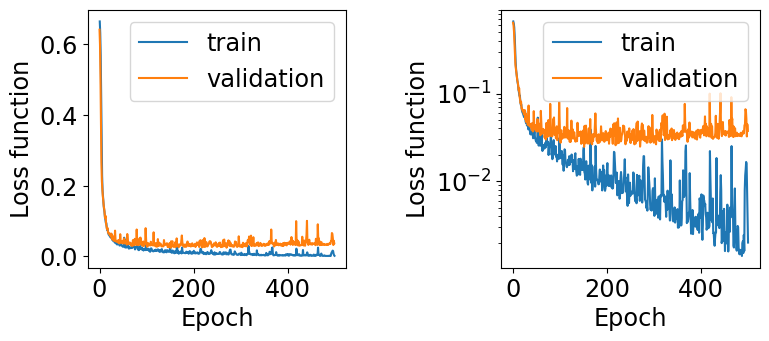

In [10]:
%%time 
def quadraticEqMLSolver(x_train, y_train, x_val, y_val):
    ##BEGIN_SOLUTION
    inputShape = (3)
    nNeurons = np.array([64, 64, 64])
    model = getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="sigmoid")
    
    initial_learning_rate = 1E-3
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                    decay_steps=1000,
                    decay_rate=0.95,
                    staircase=True)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
                      loss=tf.keras.losses.BinaryCrossentropy(),
                      metrics=['Accuracy','FalsePositives'])
    
    nEpochs = 500
    history = model.fit(x=x_train, y=y_train, 
                        epochs=nEpochs, 
                        batch_size = 32,
                        validation_data=(x_val, y_val),
                        verbose=0)
    plf.plotTrainHistory(history)
    model.evaluate(x_train, y_train)
    
    val_loss, val_acc, val_fpr = model.evaluate(x_val, y_val)
    val_fpr /= np.sum(1-y_val)
    
    print(colored("Validation accuracy:","blue"),val_acc)
    print(colored("Validation FPR","blue"),val_fpr)
    ##BEGIN_SOLUTION
    return model

model = quadraticEqMLSolver(x_train, y_train, x_val, y_val);

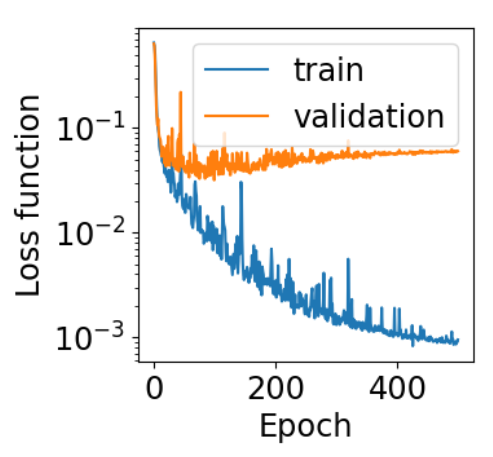

**przetrenowanie:** model dopasowuje się do konkretnych wartości
obecnych w zbiorze uczącym, ale słano się `generalizuje` - reaguje na 
nowe wartości nieobecne w zbiorze uczącycm.

**typowy objaw:** funkcja straty maleje na zbiorze uczącym, ale zatrzymuje się, lub nawet zaczyna rosnąć na zbiorze testowym.

**lekarstwa:**

* zwiększenie zbioru uczącego
* regularyzacja modelu

**Proszę:**


* zwiększyć rozmiar próbki uczącej do 10 000 przykładow i przeprowadzić trening ponownie

Training data shapes:  (10000, 3) (10000, 1)
Validation data shapes:  (10000, 3) (10000, 1)
313/313 [==============================] - 0s 993us/step - loss: 0.0083 - Accuracy: 0.9968 - false_positives: 16.0000
Validation accuracy: 0.9968000054359436
Validation FPR 0.004302231782737295
CPU times: user 11min 32s, sys: 41.4 s, total: 12min 13s
Wall time: 7min 48s


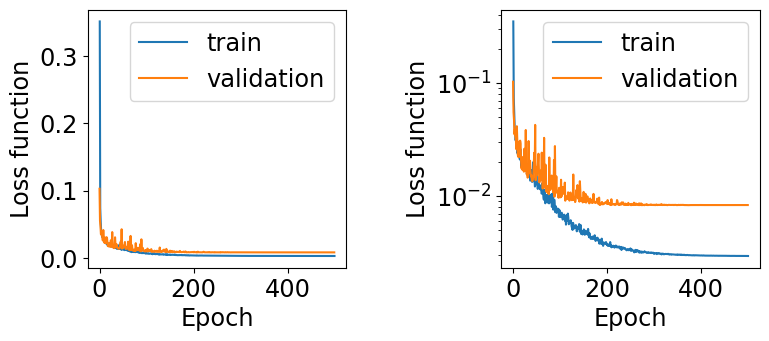

In [11]:
%%time
#BEGIN_SOLUTION
nSamples = 10000
x_train = qef.quadraticEqGenertor(nSamples)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)

print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)

model = quadraticEqMLSolver(x_train, y_train, x_val, y_val)
#END_SOLUTION
pass

## Regularyzacja wag 

Standardową procedurą przeciwdziałającą jest nałożenie ograniczeń na wartości wag. Dwa najbardziej popularne warianty to:

* **regularyzacja L1:**
$$
\huge{
\sum |w_{i}| < C
}
$$

* **regularyzacja L2:**
$$
\huge{
\sum w_{i}^{2} < C
}
$$

Regularyzacja `l1` może sprowadzić niektóre wagi modelu do `0`, czego nie robi `l2`.

Formalnie regularyzację zadaje się poprzez dodanie mnoścnia Largange'a do funkcji straty. 
W przypadku regularyzacji L2 funkcja straty ma postać:
$$
\huge{
L_{\text regularised} = L_{\text raw} +  \lambda \cdot \sum w_{i}^{2}
}
$$

Praktycznie regularyzacja może być różna dla każdej warsty, więc definiuje się ją w konstruktorze warstwy:
```Python
tf.keras.layers.Dense(
    units,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None
)
```

**Proszę:**

* wrócić do zbiorów treningowego i walidacyjnego o 1000 elementach
* w warstwach ukrytych użyć regularyzacji L2
* proszę poeksperymentować z wartością $\lambda$

**Wskazówki:** 
* można zmodyfikować funkcję generującą model
* model może utykać w stanie słabego wytrenowania - to jest zjawisko "umierania neuronów" - neurony utykają w stanie `0` z zerowym gradientem.

313/313 [==============================] - 0s 1ms/step - loss: 0.1524 - Accuracy: 0.9811 - false_positives: 164.0000
Validation accuracy: 0.9811000227928162
Validation FPR 0.04409787577305727
CPU times: user 4min 6s, sys: 15.8 s, total: 4min 22s
Wall time: 2min 44s


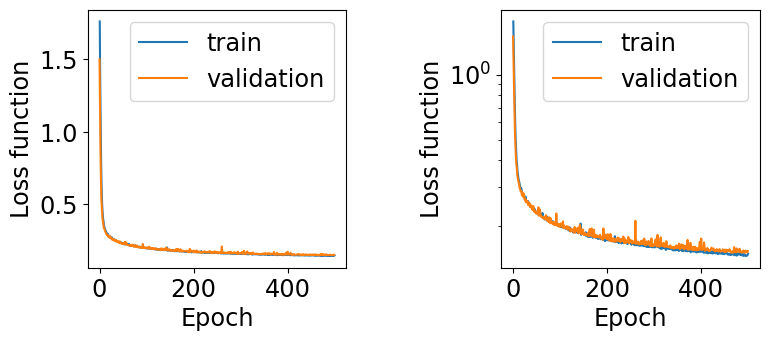

In [12]:
%%time
#BEGIN_SOLUTION
nSamples = 1000
x_train = qef.quadraticEqGenertor(nSamples)
y_train = np.all(qef.quadraticEqSolution(x_train)!=None, axis=1).reshape(-1,1)

def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):
   
    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer='glorot_uniform',
                                  kernel_regularizer=tf.keras.regularizers.L2(l2=0.01),
                                  name="layer_"+str(iLayer))(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

model = quadraticEqMLSolver(x_train, y_train, x_val, y_val)
#END_SOLUTION
pass

## Regularyzacja przez porzucanie neuronów (ang. dropout)

Inna metodą regularyzacji niż nakładanie warunków na wagi może być wprowadzenie zaburzeń do sieci w czasie treningu.
Najbardziej popularną metodą jest losowe wyłączanie niektórych neuronów, ang. `dropout`.

Algorytm porzucania jest sterowany przez parametr `dropout_rate` który okleśla jaki ułamek neuronów będzie wyłączony w każdej iteracji
pętlu uczącej. **W każdej iteracji są porzucane losowe neurony**.

Porzucanie jest zaimplementowane jako dedykowana warstwa, która odcina wyjście z porzuconych neuronów w poprzedniej warstwie:
```Python
tf.keras.layers.Dropout(
    rate, noise_shape=None, seed=None, **kwargs
)
```

**Uwaga:** porzucanie jest aktywne tylko w czasie treningu. Jeśli używamy metod typu  `model.fit()`, `model.predict()` odpowiedni tryb jest ustawiany automatycznie. Bezpośrednie sterowanie trybem można uzyskać przez wartość parametru `training` operatora `()`:
```Python
model(x_test, training=True)
```
Niestety operator `()` nie działa dla paczek danych. Jeśłi chcemy przetwarzać paczki danych trzeba ustawić parametr `training` bezpośrednio dla warstw. 

313/313 [==============================] - 0s 1ms/step - loss: 0.1658 - Accuracy: 0.9665 - false_positives: 262.0000
Validation accuracy: 0.9664999842643738
Validation FPR 0.07044904544232321
CPU times: user 4min 9s, sys: 15.2 s, total: 4min 25s
Wall time: 2min 47s


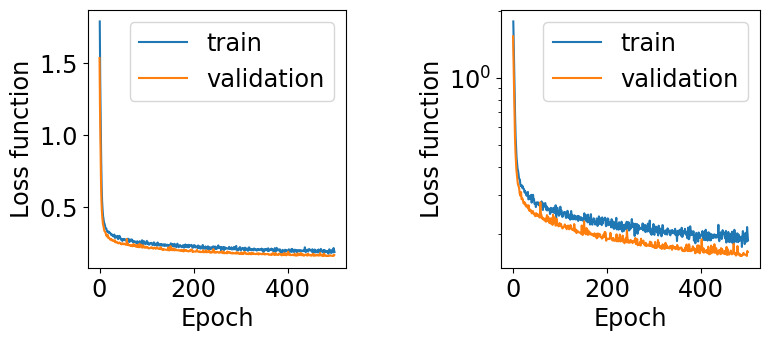

In [13]:
%%time
##BEGIN_SOLUTION
def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):
   
    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation, 
                                  kernel_initializer='glorot_uniform',
                                  kernel_regularizer=tf.keras.regularizers.L2(l2=0.01),
                                  name="layer_"+str(iLayer))(x)
        x = tf.keras.layers.Dropout(name="dropout_layer_"+str(iLayer),rate=0.2)(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

model = quadraticEqMLSolver(x_train, y_train, x_val, y_val)
#END_SOLUTION
pass

## Regularyzacja Monte Carlo

Regularyzacja przez porzucanie tworzy de facto losowe sieci w każdej iteracji - sieci różnią się listą aktywnych neuronów.
Ten fakt można wykorzystać do stworzenia zespołu (komitetu) sieci w czasie predykcji - wystarczy aktywować warstwy opuszczające w czasie predykcji.
Obliczająć średnią z odpowiedzi wielu wariantów sieci możemy zredukować błąd sieci oraz oszacować rozrzut jej wyników.

**Proszę:**

* wytrenować model z regularyzacją L2 i opuszczaniem wartsw. Można skorzystać z modelu wytrenowane w poprzedniej komórce
* stworzyć zbiór 100 odpowiedzi modeli z warstwami opuszczającymi włączonymi na czas predykcji
* odpowiedż komitetu zdefiniować jako opcję która uzyska najwięcej głosów
* obliczyć dokładność i FPR dla zbioru walidacyjnego

**Wskazówki:**
* proszę zajrzeć dod dokumentacji `tf.keras.Model` i sprawdzić jak włączyć stan taki jak w czasie treningu
* w trakcje rozwoju kodu można ustawić liczbę modeli na `1` by przyspieszyć pętlę `koduj-testuj`

In [14]:
%%time
##BEGIN_SOLUTION
nModels = 100

ensemble = np.stack([model(x_val, training=True) for iModel in range(0,nModels)]) 
mean = ensemble.mean(axis=0)>0.5
std = ensemble.std(axis=0)

val_acc = np.mean(mean==y_val)
val_fpr = np.sum(mean*(1-y_val))/np.sum(1-y_val)
val_fnr = np.sum((1-mean)*y_val)/np.sum(y_val)
    
print(colored("Validation accuracy:","blue"),val_acc)
print(colored("Validation FPR","blue"),val_fpr)
print(colored("Validation FNR","blue"),val_fnr)
#END_SOLUTION
pass

Validation accuracy: 0.9666
Validation FPR 0.07152460338800753
Validation FNR 0.010826301544340073
CPU times: user 333 ms, sys: 417 µs, total: 333 ms
Wall time: 339 ms


# Zadanie domowe

**Proszę:** 

zbudować model który będzie znajdował rozwiązania równania kwadratowego. Można przyjąć że model otrzymuje jedynie równiania które mają rozwiązania.

* proszę narysować histogram różnicy względnej:

  $$
   \delta = \frac{model - true}{true}
  $$
* proszę obliczyć wartość metryki:
  $$
  x = \text{ułamek przypadków dla których}~\delta<10^{-2}
  $$

Można próbować wszykiego (poza oszukiwaniem) by uzyskać porządaną precyzję modeli.

Jeśli wyniki nie będą spektakularne należy co najmniej uzasadnić że model się uczy, tzn. wyniki modelu w jakimś stopniu skorelowane z oczekiwanymi wartościami.

In [15]:
#Input data preparation
##BEGIN_SOLUTION
x = np.random.default_rng().uniform(-1,1,(35000,3))
y = qef.quadraticEqSolution(x) 

#Select equations with solution
mask = y[:,0]!=None
x = x[mask].astype(float)
y= y[mask].astype(float)

#Sort solutions for each equation
y = np.sort(y, axis=1)

x_val = x[:10000,:]
y_val = y[:10000,:]

x_train = x[10000:,:]
y_train = y[10000:,:]

print(colored("Training data shapes: ","blue"), x_train.shape, y_train.shape)
print(colored("Validation data shapes: ","blue"), x_val.shape, y_val.shape)
#END_SOLUTION
pass

Training data shapes:  (11925, 3) (11925, 2)
Validation data shapes:  (10000, 3) (10000, 2)


Training dataset.
373/373 [==============================] - 0s 898us/step
Fraction of events with Y==Y_pred: 0.00016771488469601676
Fraction of examples with abs(pull)<0.01: 0.10
Pull standard deviation: 9.56
Validation dataset.
313/313 [==============================] - 0s 878us/step
Fraction of events with Y==Y_pred: 0.0001
Fraction of examples with abs(pull)<0.01: 0.09
Pull standard deviation: 99.81
CPU times: user 30min 49s, sys: 1min 15s, total: 32min 4s
Wall time: 25min 18s


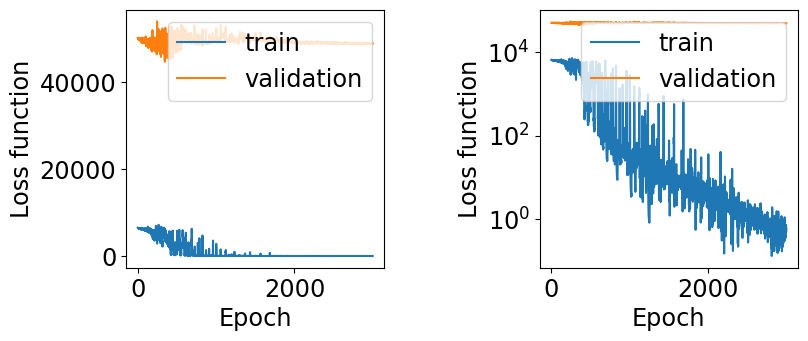

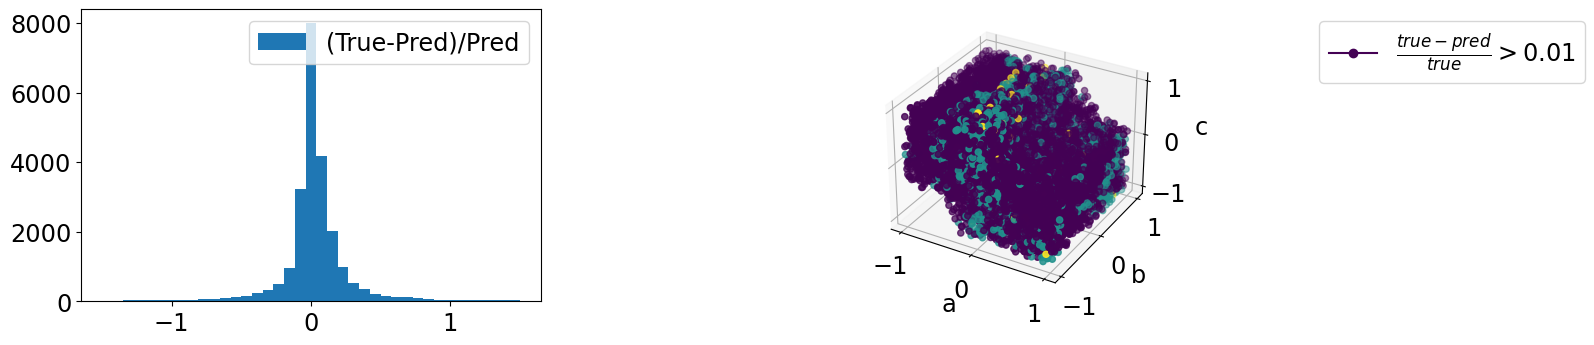

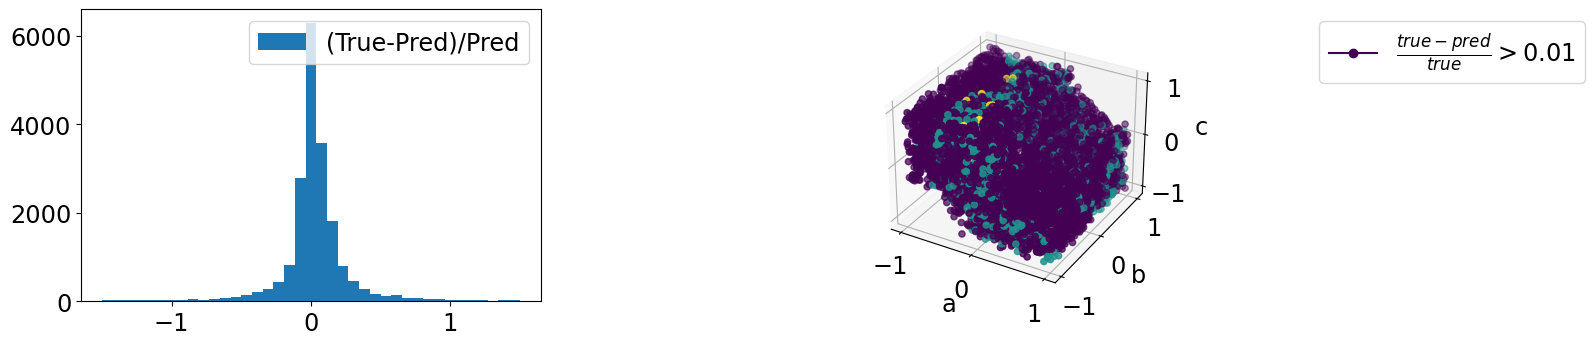

In [16]:
%%time
#model definition and training
#BEGIN_SOLUTION
inputShape = (3)

nNeurons = np.full((10),128)
nOutputNeurons = 2

def getModel(inputShape, nNeurons, hiddenActivation="relu", outputActivation="linear", nOutputNeurons=1):
   
    inputs = tf.keras.Input(shape=inputShape, name="features")
    x = inputs
    
    for iLayer, n in enumerate(nNeurons):
        x = tf.keras.layers.Dense(n, activation=hiddenActivation,
                                  kernel_initializer='he_normal',
                                  bias_initializer=tf.keras.initializers.RandomUniform(minval=-1, maxval=1),
                                  name="layer_"+str(iLayer))(x)
                
    outputs = tf.keras.layers.Dense(nOutputNeurons, activation=outputActivation, name = "output")(x)   
    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")
    return model

model = getModel(inputShape=inputShape, nOutputNeurons=nOutputNeurons, 
                 nNeurons=nNeurons, 
                 hiddenActivation="relu", 
                 outputActivation="linear")

#configure learning process
initial_learning_rate = 5E-4
batchSize = 128
nEpochs = 6000

nStepsPerEpoch = len(x_train)/batchSize
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*50,
                decay_rate=0.95,
                staircase=False)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule), loss='mse')

#run training
history = model.fit(x=x_train, y=y_train, 
                    epochs=nEpochs, 
                    batch_size = batchSize,
                    validation_data=(x_val, y_val),
                    verbose=0)
plf.plotTrainHistory(history)

#performance on training dataset
print(colored("Training dataset.","blue"))
y_pred = model.predict(x_train)
qef.plotSqEqSolutions(x_train, y_train, y_pred)
#performance on training dataset
print(colored("Validation dataset.","blue"))
y_pred = model.predict(x_val)
qef.plotSqEqSolutions(x_val, y_val, y_pred)
#END_SOLUTION
pass

Training dataset.
373/373 [==============================] - 1s 1ms/step
Fraction of events with Y==Y_pred: 0.00012578616352201257
Fraction of examples with abs(pull)<0.01: 0.09
Pull standard deviation: 5.37
Validation dataset.
313/313 [==============================] - 0s 854us/step
Fraction of events with Y==Y_pred: 0.0002
Fraction of examples with abs(pull)<0.01: 0.09
Pull standard deviation: 6.65
CPU times: user 20min 5s, sys: 51.5 s, total: 20min 57s
Wall time: 16min


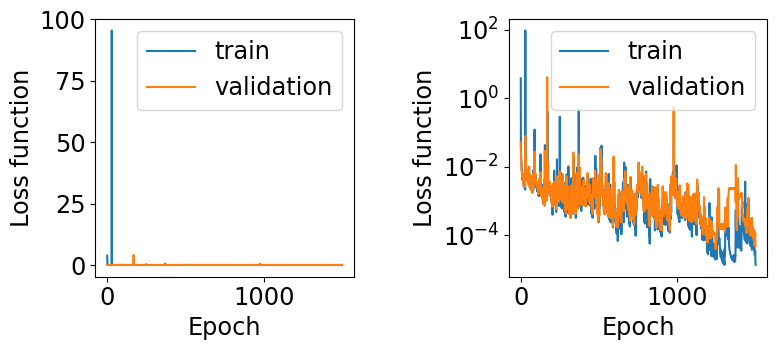

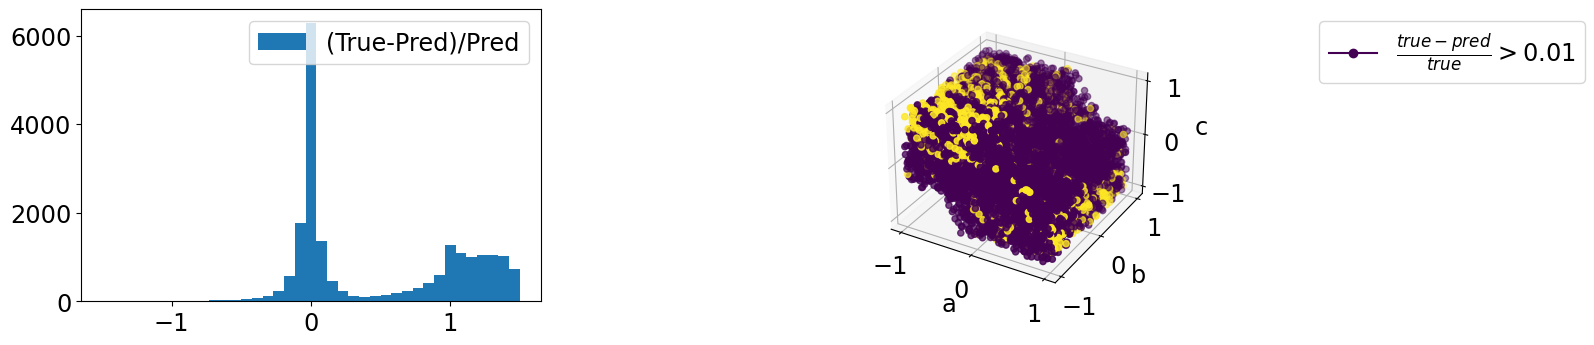

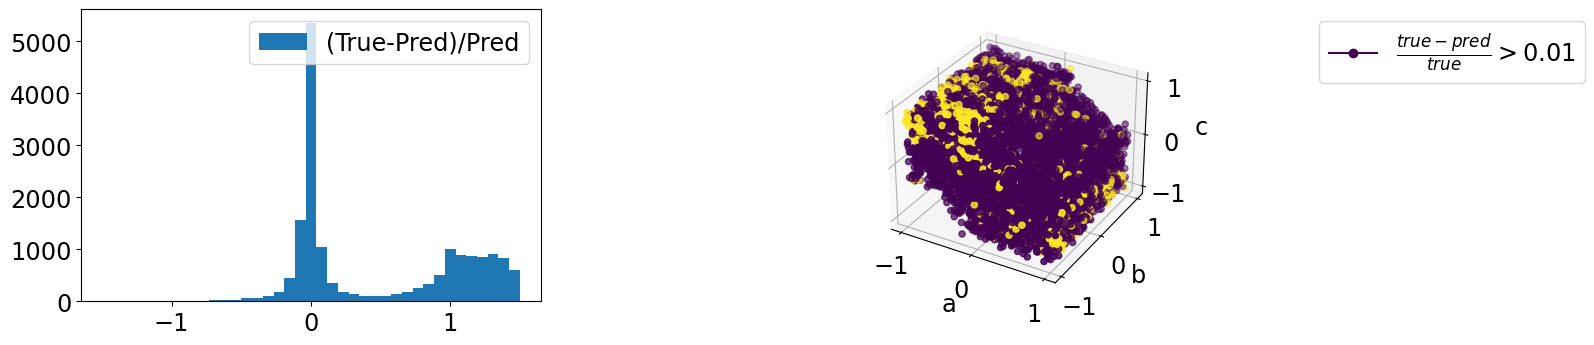

In [17]:
%%time

#BEGIN_SOLUTION
#training with a dedicated loss function
model = getModel(inputShape=inputShape, nOutputNeurons=nOutputNeurons, 
                 nNeurons=nNeurons, 
                 hiddenActivation="relu", 
                 outputActivation="linear")

initial_learning_rate = 5E-4
nStepsPerEpoch = len(x_train)/batchSize
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=nStepsPerEpoch*50,
                decay_rate=0.95,
                staircase=False)

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr_schedule),
              loss = qef.QuadraticEquationLoss())

nEpochs = 1500
history = model.fit(x=x_train, y=x_train, 
                    epochs=nEpochs, 
                    batch_size = batchSize,
                    validation_data=(x_val, x_val),
                    verbose=0)
plf.plotTrainHistory(history)

#performance on training 
print(colored("Training dataset.","red"))
y_pred = model.predict(x_train)
qef.plotSqEqSolutions(x_train, y_train, y_pred)
#and validation datasets
print(colored("Validation dataset.","red"))
y_pred = model.predict(x_val)
qef.plotSqEqSolutions(x_val, y_val, y_pred)
#END_SOLUTION
pass